# Module 11 In-Class Exercises: K-Mean Clustering

### In this exerices, we are going to conudct hierarchical clustering analysis sklearn cluster Kmeans package.


In [2]:
# import required packages for this chapter

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans




## Pharmaceutical Industry
An equities analyst is studying the pharmaceutical industry and would like your help in exploring and
understanding the financial data collected by her firm. Her main objective is to understand the structure of the pharmaceutical industry using some basic financial measures.

Financial data gathered on 21 firms in the pharmaceutical industry are available in the file _pharmaceuticals.csv_. For each firm, the following variables are recorded:

1. Market capitalization (in billions of dollars)
2. Beta
3. Price/earnings ratio
4. Return on equity
5. Return on assets
6. Asset turnover
7. Leverage
8. Estimated revenue growth
9. Net profit margin
10. Median recommendation (across major brokerages)
11. Location of firm's headquarters
12. Stock exchange on which the firm is listed

Use only the numerical variables (1-9) to cluster the 21 firms.


In [3]:
# Load data, use the column Company as row names
pharma_df=pd.read_csv("C:/Users/erwin/Desktop/MIS536/Module11/pharmaceuticals.csv")
pharma_df.set_index('Symbol', inplace = True) #replacing a numbered index with the 1st column in dataset, "Symbol"
pharma_df.head()


,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Symbol,,,,,,,,,,,,,
ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


In [5]:
# Use only the numerical variables (1-9) to cluster the 21 firms.
# Drop unused varaibles

pharma_data = pharma_df.drop(columns=["Name",  "Median_Recommendation", "Location", "Exchange"]) #we're not  dropping symbol because earlier we made it the index. It's not part of the data anymore
print(pharma_data)

        Market_Cap  Beta  PE_Ratio   ROE   ROA  Asset_Turnover  Leverage  \
Symbol                                                                     
ABT          68.44  0.32      24.7  26.4  11.8             0.7      0.42   
AGN           7.58  0.41      82.5  12.9   5.5             0.9      0.60   
AHM           6.30  0.46      20.7  14.9   7.8             0.9      0.27   
AZN          67.63  0.52      21.5  27.4  15.4             0.9      0.00   
AVE          47.16  0.32      20.1  21.8   7.5             0.6      0.34   
BAY          16.90  1.11      27.9   3.9   1.4             0.6      0.00   
BMY          51.33  0.50      13.9  34.8  15.1             0.9      0.57   
CHTT          0.41  0.85      26.0  24.1   4.3             0.6      3.51   
ELN           0.78  1.08       3.6  15.1   5.1             0.3      1.07   
LLY          73.84  0.18      27.9  31.0  13.5             0.6      0.53   
GSK         122.11  0.35      18.0  62.9  20.3             1.0      0.34   
IVX         

In [7]:
# Normalize: normalization gives the same importance to all the variables and so is important for distance calculations.


pharma_norm=pharma_data.apply(preprocessing.scale, axis = 0) #axis = 0  is the default for preprocessing
print(pharma_norm.head()) #for the entire dataset, mean is now 0 & std.dev is 1

        Market_Cap      Beta  PE_Ratio       ROE       ROA  Asset_Turnover  \
Symbol                                                                       
ABT       0.188642 -0.821041 -0.047867  0.041080  0.247579   -5.247542e-16   
AGN      -0.875518 -0.461835  3.583430 -0.875950 -0.965557    9.453132e-01   
AHM      -0.897899 -0.262277 -0.299168 -0.740094 -0.522666    9.453132e-01   
AZN       0.174479 -0.022807 -0.248907  0.109009  0.940799    9.453132e-01   
AVE      -0.183447 -0.821041 -0.336863 -0.271389 -0.580435   -4.726566e-01   

        Leverage  Rev_Growth  Net_Profit_Margin  
Symbol                                           
ABT    -0.217336   -0.540801           0.063205  
AGN     0.018736   -0.390551          -1.592035  
AHM    -0.414062   -0.586247          -0.701953  
AZN    -0.768169    0.151089           0.359900  
AVE    -0.322256    1.246425          -0.436490  


C:\Users\erwin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


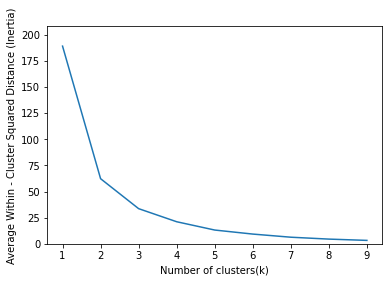

In [10]:
# k-means clustering

inertia = []

for k in range(1,10):
    kmeans=KMeans(n_clusters=k, random_state=1).fit(pharma_norm)
    inertia.append(kmeans.inertia_/k)

inertias=pd.DataFrame({'n_clusters': range(1,10), 'inertia':inertia})
ax=inertias.plot(x='n_clusters', y='inertia')
plt.xlabel("Number of clusters(k)")
plt.ylabel('Average Within - Cluster Squared Distance (Inertia)')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [14]:
# Three to four clusters seem to be a good choice

#the at 3 or 4, there's very little significant decrease in the slope. use the elbow method to find the correct "K". We'll use K=4 this time.

kmeans=KMeans(n_clusters=4, random_state=8).fit(pharma_norm)
print(kmeans.predict(pharma_norm))
#these 21 companies have now been divided into 4 clusters, from 0 - 3

[3 2 2 3 1 2 3 2 1 3 0 2 0 1 0 3 0 2 3 1 3]


In [16]:
#now we can see which cluster, a random new company will fit into. Just input new values for it's variables and plug it into our model

newdata=[[7.58,0.3,79.67,12.9,5.5,0.9,0.3,10,5.5]]
print(kmeans.predict(newdata))

#We put the new company into a new 2-D array of data and enter it into our prediction method.  We found that this new company belongs in cluster labeled 2

[2]


C:\Users\erwin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [19]:
#we can print out centroid information to learn more about the clusters

clusters=pd.DataFrame(kmeans.cluster_centers_.transpose(), columns=['Cluster1','Cluser2','Cluster3','Cluster4'],index=[pharma_norm.columns])

print(clusters)


                   Cluster1   Cluser2      Cluster3  Cluster4
Market_Cap         1.737454 -0.778999 -7.456891e-01  0.091474
Beta              -0.182453  0.286509  4.827414e-01 -0.473239
PE_Ratio          -0.203359 -0.489214  8.452981e-01 -0.328785
ROE                1.265486 -0.762170 -7.253760e-01  0.334142
ROA                1.383690 -0.830764 -1.013697e+00  0.552926
Asset_Turnover     1.181641 -1.299806 -3.172066e-16  0.067522
Leverage          -0.479637  0.064639  5.826845e-01 -0.262302
Rev_Growth         0.478716  1.555503 -4.917997e-01 -0.740868
Net_Profit_Margin  0.605843 -0.007064 -1.277123e+00  0.752517
